In [1]:
%matplotlib inline
import numpy as np
import pylab as plt
import seaborn as sns

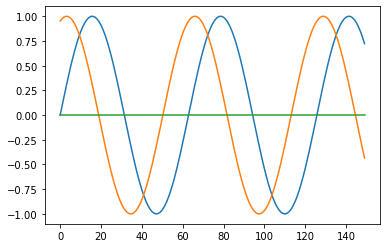

In [2]:
T = 150
t = .4

A = np.sin(np.array(range(T))/10)
B = np.sin((np.array(range(T))/10 + t*np.pi))
C = np.zeros((T))

plt.plot(A)
plt.plot(B)
plt.plot(C)
plt.show()

In [3]:
mse = lambda a,b: ((a-b)**2).mean()
print("A-B: ", mse(A,B))
print("A-C: ", mse(A,C))

A-B:  0.6639470476737607
A-C:  0.5150026855435942


In [4]:
δ = lambda a,b: (a - b)**2
first = lambda x: x[0]
second = lambda x: x[1]

def minVal(v1, v2, v3):
    if first(v1) <= min(first(v2), first(v3)):
        return v1, 0
    elif first(v2) <= first(v3):
        return v2, 1
    else:
        return v3, 2 

def calc_dtw(A, B):
    S = len(A)
    T = len(B)

    m = [[0 for j in range(T)] for i in range(S)]
    m[0][0] = (δ(A[0],B[0]), (-1,-1))
    for i in range(1,S):
        m[i][0] = (m[i-1][0][0] + δ(A[i], B[0]), (i-1,0))
    for j in range(1,T):
        m[0][j] = (m[0][j-1][0] + δ(A[0], B[j]), (0,j-1))

    for i in range(1,S):
        for j in range(1,T):
            minimum, index = minVal(m[i-1][j], m[i][j-1], m[i-1][j-1])
            indexes = [(i-1,j), (i,j-1), (i-1,j-1)]
            m[i][j] = (first(minimum)+δ(A[i], B[j]), indexes[index])
    return m

In [5]:
print("A-B: ", calc_dtw(A, B)[-1][-1][0])
print("A-C: ", calc_dtw(A, C)[-1][-1][0])

A-B:  9.673716299718745
A-C:  77.2504028315391


In [6]:
def backward(m):
    path = []
    path.append([len(m)-1, len(m[0])-1])
    while True:
        path.append(m[path[-1][0]][path[-1][1]][1])
        if path[-1]==(0,0):
            break
    path = np.array(path)
    return path

import matplotlib.gridspec as gridspec

def plot_path(path, A, B):
    gs = gridspec.GridSpec(2, 2,
                       width_ratios=[1,5],
                       height_ratios=[5,1]
                       )
    ax1 = plt.subplot(gs[0])
    ax2 = plt.subplot(gs[1])
    ax4 = plt.subplot(gs[3])
    
    list_δ = [[t[0] for t in row] for row in m]
    list_δ = np.array(list_δ)
    ax2.pcolor(list_δ, cmap=plt.cm.Blues)
    ax2.plot(path[:,1], path[:,0], c="C3")
    
    ax1.plot(A, range(len(A)))
    ax1.invert_xaxis()
    ax4.plot(B, c="C1")
    plt.show()
    
    for line in path:
        plt.plot(line, [A[line[0]], B[line[1]]], linewidth=0.2, c="gray")
    plt.plot(A)
    plt.plot(B)
    plt.show()

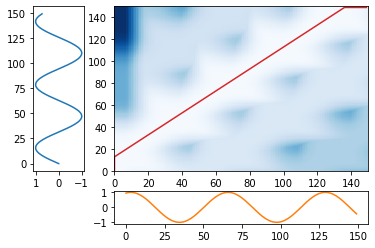

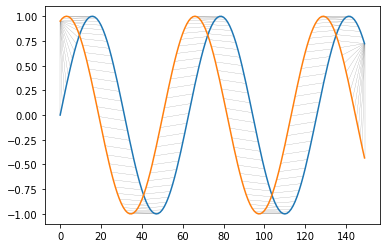

In [7]:
m = calc_dtw(A, B)
path = backward(m)
plot_path(path, A, B)

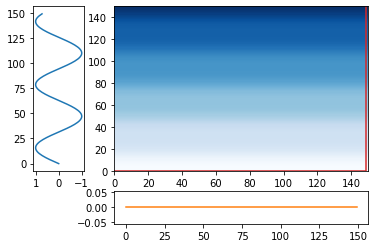

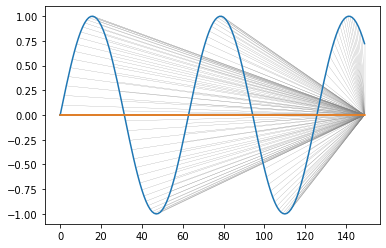

In [8]:
m = calc_dtw(A, C)
path = backward(m)
plot_path(path, A, C)

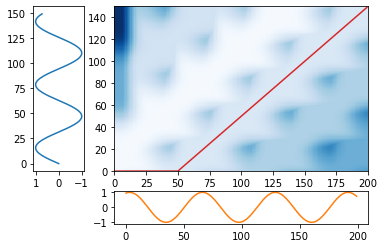

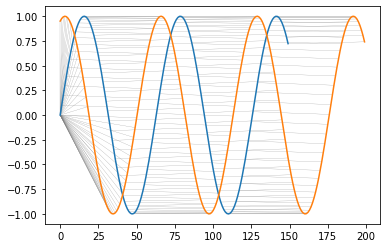

In [9]:
T = 150
S = 200
t = .4

A = np.sin(np.array(range(T))/10)
D = np.sin((np.array(range(S))/10 + t*np.pi))

m = calc_dtw(A, D)
path = backward(m)
plot_path(path, A, D)

In [10]:
list_dtw_AB = []
list_mse_AB = []
list_dtw_AC = []
list_mse_AC = []
for t in np.arange(0, 2, 0.1):
    T = 150
    A = np.sin(np.array(range(T))/10)
    B = np.sin((np.array(range(T))/10 + t*np.pi))
    list_dtw_AB.append(calc_dtw(A, B)[-1][-1][0])
    list_mse_AB.append(mse(A,B))
    list_dtw_AC.append(calc_dtw(A, C)[-1][-1][0])
    list_mse_AC.append(mse(A,C))

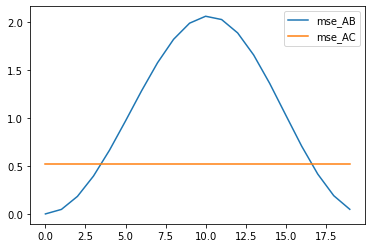

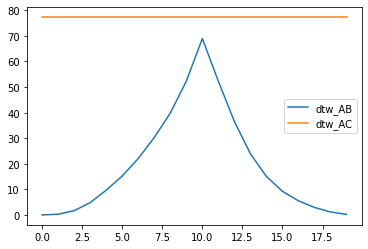

In [11]:
plt.plot(list_mse_AB, label="mse_AB")
plt.plot(list_mse_AC, label="mse_AC")
plt.legend()
plt.show()

plt.plot(list_dtw_AB, label="dtw_AB")
plt.plot(list_dtw_AC, label="dtw_AC")
plt.legend()
plt.show()

In [29]:
import pandas  as pd

data = pd.read_csv("../00.data/dtw_data.csv", encoding='SHIFT-JIS')
#data.index = data["Unnamed: 0"]
#data = data[data.columns[1::3]]
#print(data.columns.get_values())
data.head()

,Series,大阪,久留米,伊万里,京都
0,2020/3/11,12.5,9.8,8.4,11.1
1,2020/3/12,10.7,9.5,8.8,9.8
2,2020/3/13,11.7,10.9,10.2,10.8
3,2020/3/14,8.9,9.9,8.8,8.4
4,2020/3/15,8.6,8.9,10.6,7.1


In [34]:
data.columns

Index(['Series', '大阪', '久留米', '伊万里', '京都'], dtype='object')

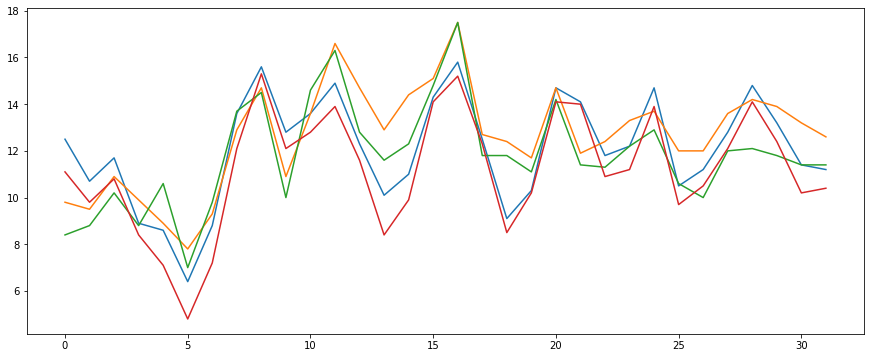

In [30]:
import matplotlib.font_manager as fm
font = {'family' : 'TakaoGothic'}
plt.rc('font', **font)

data.plot(figsize=(15,6), legend=False)
plt.show()

In [44]:
#dtw=['大阪', '久留米', '伊万里', '京都']

dtw = []
for i,(key1, key2) in enumerate(product(data.columns, data.columns)):
    dtw.append(calc_dtw(data[key1].get_values(), data[key2].get_values())[-1][-1][0])

AttributeError: 'Series' object has no attribute 'get_values'

In [39]:
dtw

['大阪', '久留米', '伊万里', '京都']

In [38]:
dtw = np.array(dtw).reshape(len(data.columns), -1)

ValueError: cannot reshape array of size 4 into shape (5,newaxis)

C:\ProgramData\Anaconda3\envs\AI\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 22823 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\envs\AI\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 38442 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\envs\AI\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 20037 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\envs\AI\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 30041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\envs\AI\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 31859 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\envs\AI\lib\site-packages\matplotlib\backends\backend_agg.py

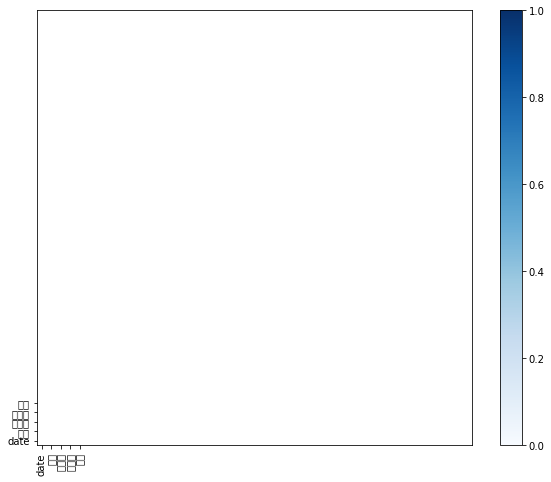

In [24]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.set_aspect("equal")
plt.pcolor(dtw, cmap=plt.cm.Blues)
plt.xlim(xmax=46)
plt.ylim(ymax=46)
plt.xticks(np.arange(0.5, len(data.columns)+0.5), list(data.columns), rotation=90)
plt.yticks(np.arange(0.5, len(data.columns)+0.5), list(data.columns))
plt.colorbar()
plt.show()